In [16]:
%pip install pyramid

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions as f

from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
# from pyramid.ARIMA import auto_arima
import os.path
from os import path


# Khởi tạo Spark Session
spark = SparkSession.builder.appName("kafka").getOrCreate()
sc = spark.sparkContext
# Tạo DataFrame mẫu
train_data = spark.read.csv("./train_data.csv", inferSchema=True, header=True)
test_data = spark.read.csv("./test_data.csv", inferSchema=True, header=True)


In [4]:
training_set = train_data.select("close").toPandas().values
# Thuc hien scale du lieu gia ve khoang 0,1
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [20]:
# Tìm kiếm tối ưu cho các tham số p, d, q
model = pm.auto_arima(training_set, start_p=1, start_q=1, max_p=10, max_q=10, m=1,
                      start_P=0, seasonal=False, d=None, D=None, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)



c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=42487.298, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=42487.838, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42485.599, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=42485.763, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=42486.212, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=42486.788, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=42488.254, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=42483.936, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=42485.109, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=42485.614, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=42484.101, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=42486.561, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.434 seconds


In [8]:
test_set = test_data.select("close").toPandas().values

In [10]:
forecast = model.predict(n_periods=len(test_set))
y_pre = forecast
y_pre = [[y] for y in y_pre]

In [13]:
y_pre


[[0.3317603280404648],
 [0.33176350005020283],
 [0.33176363314286994],
 [0.33176363872723424],
 [0.3317636389615456],
 [0.33176363897137695],
 [0.33176363897178945],
 [0.3317636389718068],
 [0.3317636389718075],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.33176363897180755],
 [0.3317636389718075

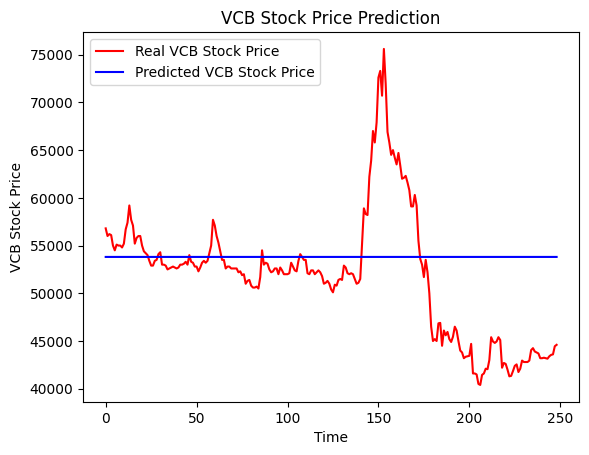

In [11]:
import matplotlib.pyplot as plt

# Ve bieu do gia that va gia du doan
plt.plot(test_set, color = 'red', label = 'Real VCB Stock Price')
plt.plot(scaler.inverse_transform(np.array(y_pre)), color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
# plt.savefig('svm_result.jpg')
plt.show()

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# Tạo dữ liệu giả định
np.random.seed(42)
data = np.cumsum(np.random.randn(200))

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train, test = train_test_split(data, train_size=150)

# Tìm kiếm tối ưu cho các tham số p, d, q
model = pm.auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=1,
                      start_P=0, seasonal=False, d=None, D=None, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)

# In thông tin về mô hình tối ưu
print(model.summary())

# Dự báo cho tập kiểm tra
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Trực quan hóa kết quả
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(np.arange(len(train), len(train) + len(test)), forecast, label='Forecast')
plt.fill_between(np.arange(len(train), len(train) + len(test)), conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()
